<a href="https://colab.research.google.com/github/mohadesehsotoudehnia/FIS-projects/blob/main/miniProject2%20/%20FIS4041_MP2_Q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Q7***

# **Part A**

# Download File from Google Drive

In [ ]:
import gdown

url = 'https://drive.google.com/uc?export=download&id=1N1CYMUrj73reoUpx33SCBUVRUFq_pLGI'
output = 'breast_cancer_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1N1CYMUrj73reoUpx33SCBUVRUFq_pLGI
To: /content/breast_cancer_data.csv
100%|██████████| 125k/125k [00:00<00:00, 68.8MB/s]


'breast_cancer_data.csv'

# Load Data

In [ ]:
import pandas as pd

data = pd.read_csv('breast_cancer_data.csv')

print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Remove Unwanted Column

In [ ]:
data = data.drop(columns=['Unnamed: 32'])

print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

# Separate Features and Labels

In [ ]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis'].map({'M': 1, 'B': 0})

# Split Data into Train, Validation, and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=43)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=43)

# Standardize Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])

[[-2.27812332e-01 -6.73295559e-01  5.39619435e-01 -7.10371620e-01
  -6.47251794e-01 -7.31927037e-01 -1.03616610e+00 -9.22714645e-01
  -9.85376096e-01 -1.15366765e+00 -6.12326949e-01 -4.62193253e-02
   2.45528566e-02 -1.39163761e-01 -2.77586889e-01 -4.03068652e-01
  -9.19676904e-01 -8.37022723e-01 -7.28989782e-01  4.55976772e-01
  -8.73447688e-01 -6.91807424e-01  2.63066870e-03 -7.30537371e-01
  -6.50719005e-01 -1.13088245e+00 -1.08103288e+00 -1.09177745e+00
  -1.20633933e+00 -8.01689986e-01 -1.05268506e+00]
 [-2.27375635e-01  7.05310197e-01  2.16219000e-01  5.98061550e-01
   5.49151397e-01 -1.53637527e+00 -6.43318403e-01 -6.76233837e-01
  -6.85169847e-01  8.70540009e-02 -1.45760619e+00 -5.59592738e-01
  -1.19449424e+00 -5.21045480e-01 -3.81194967e-01 -1.43400480e+00
  -6.47106240e-01 -7.27350966e-01 -1.09464634e+00 -8.41298508e-02
  -9.03718688e-01  5.47076778e-01  1.38646687e-01  5.43059765e-01
   3.00714203e-01 -1.47746369e+00  1.88981937e-01 -1.47184734e-01
  -4.55651177e-01  2.9450

# Apply PCA for 2D Visualization

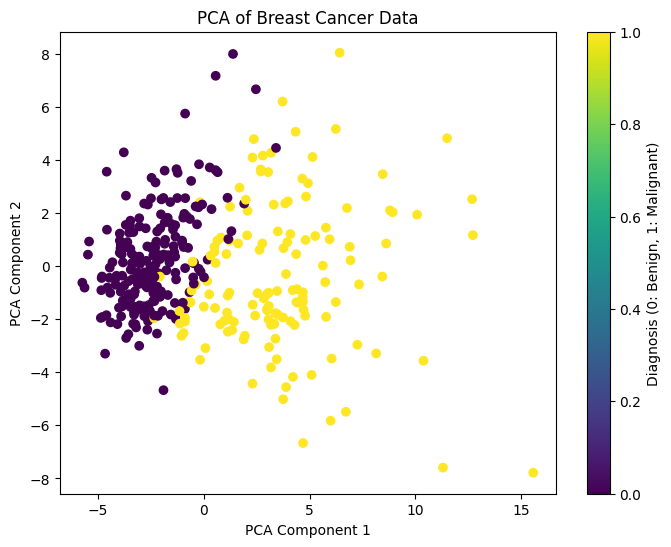

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'], c=y_train, cmap='viridis')
plt.title('PCA of Breast Cancer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Diagnosis (0: Benign, 1: Malignant)')
plt.show()

# **Part B**

# Train SVC Model (Kernel = 'linear')

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=43)

svc.fit(X_train_scaled, y_train)

y_val_pred = svc.predict(X_val_scaled)
y_test_pred = svc.predict(X_test_scaled)

# Calculate and Report Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f'Validation Accuracy: {accuracy_val:.4f}')
print(f'Test Accuracy: {accuracy_test:.4f}')

Validation Accuracy: 0.9649
Test Accuracy: 0.9561


# Calculate and Report ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_val = roc_auc_score(y_val, y_val_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

print(f'Validation ROC-AUC: {roc_auc_val:.4f}')
print(f'Test ROC-AUC: {roc_auc_test:.4f}')

Validation ROC-AUC: 0.9667
Test ROC-AUC: 0.9605


# Calculate F1, Recall, and Precision

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

f1_val = f1_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)

f1_test = f1_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)

print(f'Validation F1: {f1_val:.4f}, Recall: {recall_val:.4f}, Precision: {precision_val:.4f}')
print(f'Test F1: {f1_test:.4f}, Recall: {recall_test:.4f}, Precision: {precision_test:.4f}')

Validation F1: 0.9444, Recall: 0.9714, Precision: 0.9189
Test F1: 0.9398, Recall: 0.9750, Precision: 0.9070


# Plot ROC Curve

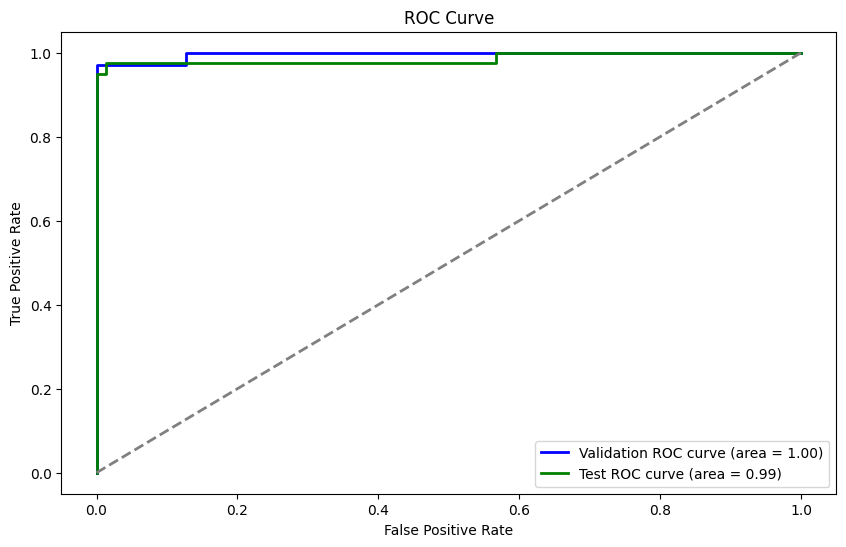

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_val, tpr_val, _ = roc_curve(y_val, svc.decision_function(X_val_scaled))
fpr_test, tpr_test, _ = roc_curve(y_test, svc.decision_function(X_test_scaled))

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Part C**

# Define C Values and Setup for Storing Results

In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]

results = []

# Train SVC Model and Predict on Validation and Test Data

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for C in C_values:
    svc = SVC(kernel='linear', C=C, random_state=43)
    svc.fit(X_train_scaled, y_train)

    y_val_pred = svc.predict(X_val_scaled)
    y_test_pred = svc.predict(X_test_scaled)

    accuracy_val = accuracy_score(y_val, y_val_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    results.append({
        'C': C,
        'Validation Accuracy': accuracy_val,
        'Test Accuracy': accuracy_test
    })

# Extract and Store Support Vectors

In [ ]:
for i, C in enumerate(C_values):
    svc = SVC(kernel='linear', C=C, random_state=43)
    svc.fit(X_train_scaled, y_train)

    support_vectors = len(svc.support_)

    results[i]['Support Vectors'] = support_vectors

# Display Results in a Neat Table

In [ ]:
import pandas as pd

results_df = pd.DataFrame(results)

print(results_df)

        C  Validation Accuracy  Test Accuracy  Support Vectors
0    0.01             0.964912       0.982456             88.0
1    0.10             0.956140       0.973684             42.0
2    1.00             0.964912       0.956140             29.0
3   10.00             0.964912       0.947368             21.0
4  100.00             0.956140       0.956140             21.0
5    0.01             0.964912       0.982456              NaN
6    0.10             0.956140       0.973684              NaN
7    1.00             0.964912       0.956140              NaN
8   10.00             0.964912       0.947368              NaN
9  100.00             0.956140       0.956140              NaN


# **Part D**

# Select Best C Based on Validation Accuracy

In [ ]:
best_C = results_df.loc[results_df['Validation Accuracy'].idxmax(), 'C']
print(f'Best C value based on validation accuracy: {best_C}')

Best C value based on validation accuracy: 0.01


# Train Model with Best C and Plot ROC Curve

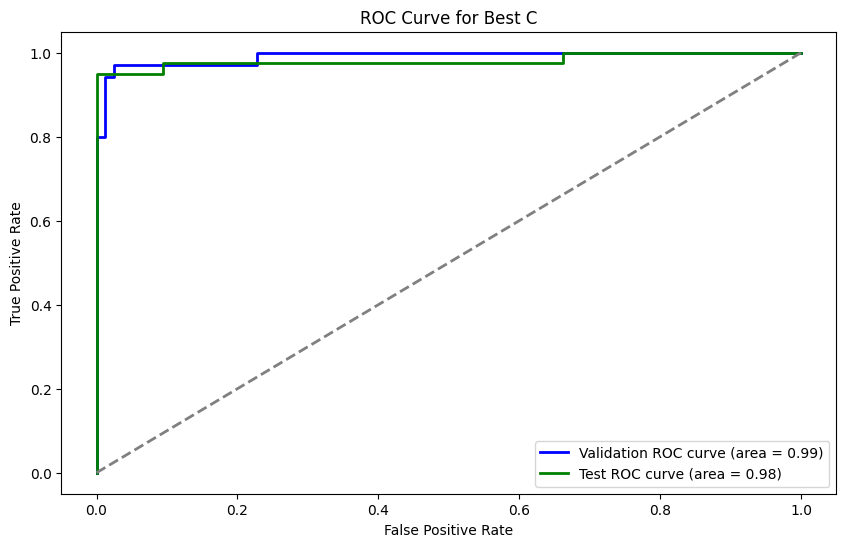

In [ ]:
from sklearn.metrics import roc_curve, auc

svc_best = SVC(kernel='linear', C=best_C, random_state=43)
svc_best.fit(X_train_scaled, y_train)

y_val_prob = svc_best.decision_function(X_val_scaled)
y_test_prob = svc_best.decision_function(X_test_scaled)

fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best C')
plt.legend(loc='lower right')
plt.show()


# Plot Precision-Recall Curve for Best C

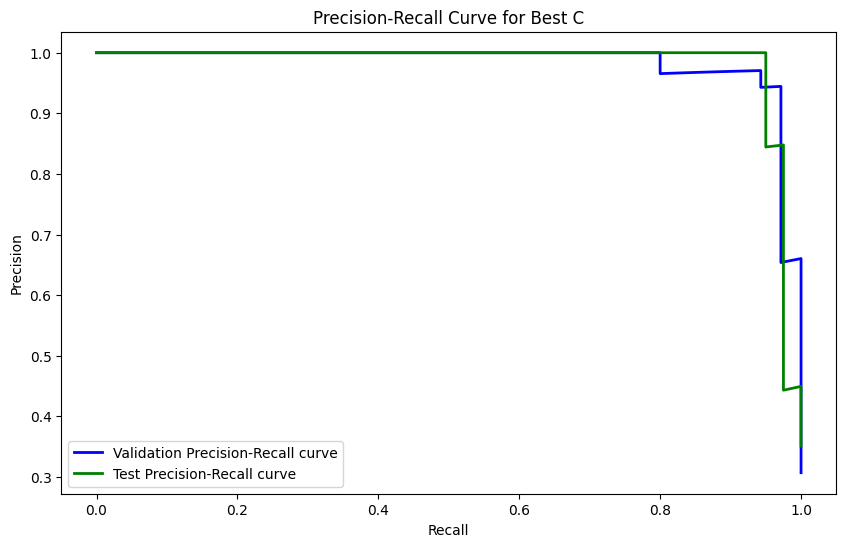

In [ ]:
from sklearn.metrics import precision_recall_curve

precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_prob)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall_val, precision_val, color='blue', lw=2, label=f'Validation Precision-Recall curve')
plt.plot(recall_test, precision_test, color='green', lw=2, label=f'Test Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Best C')
plt.legend(loc='lower left')
plt.show()